# More EUC computations

1. Plot STD -vs- time, based on 1993-2017 EUC
2. Plot time mean +/- std -vs- time and STD -vs- time for
    - 1993-2002
    - 2003-2012

In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
euc = xr.open_dataset('/workspace/results/eccov4r4/equatorial-upwelling-current/euc_eccov4r4.nc')

In [3]:
figdir = '/workspace/results/eccov4r4/equatorial-upwelling-current/figures'
if not os.path.isdir(figdir):
    os.makedirs(figdir)

In [6]:
years = [('1993','2017'),
         ('1993','2012'),
         ('1993','2002'),
         ('2003','2012')]

In [31]:
#for (yr1,yr2) in years:
#    time_slice=slice(yr1,yr2)
#    print(euc.time.sel(time=time_slice))
#    print()

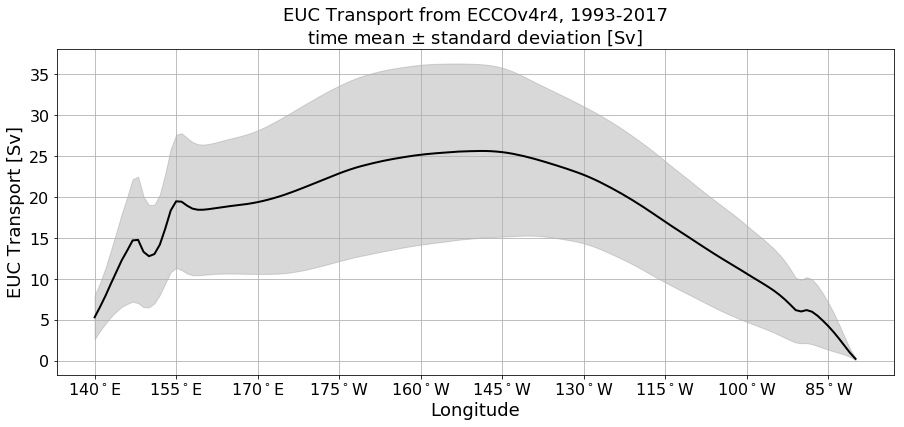

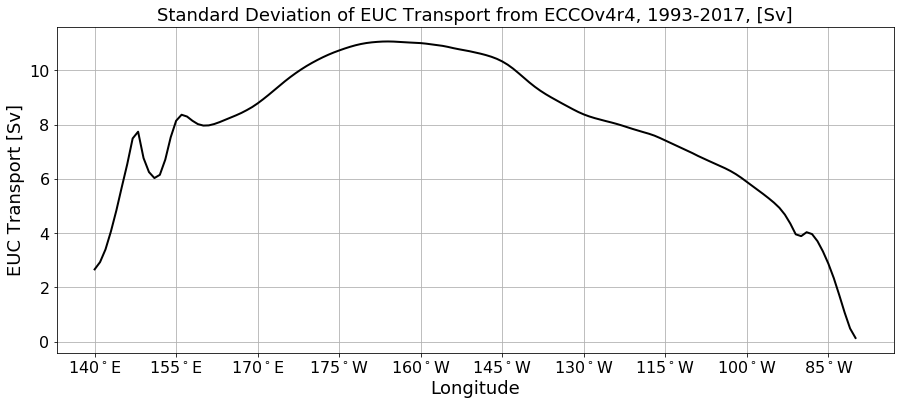

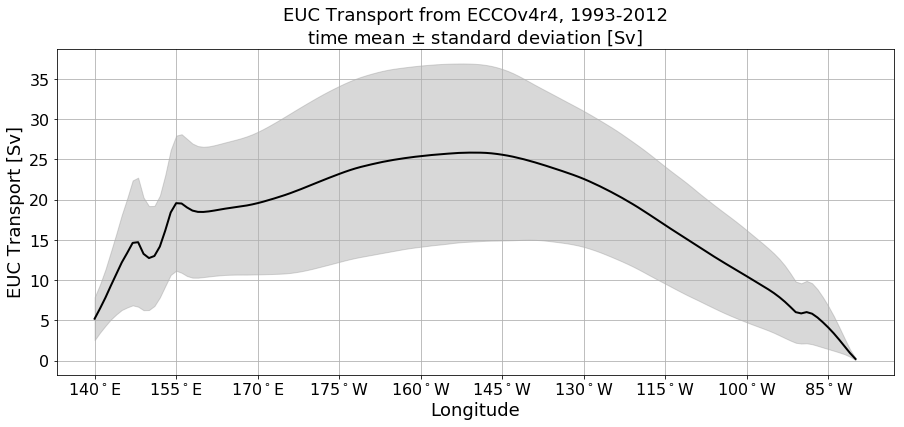

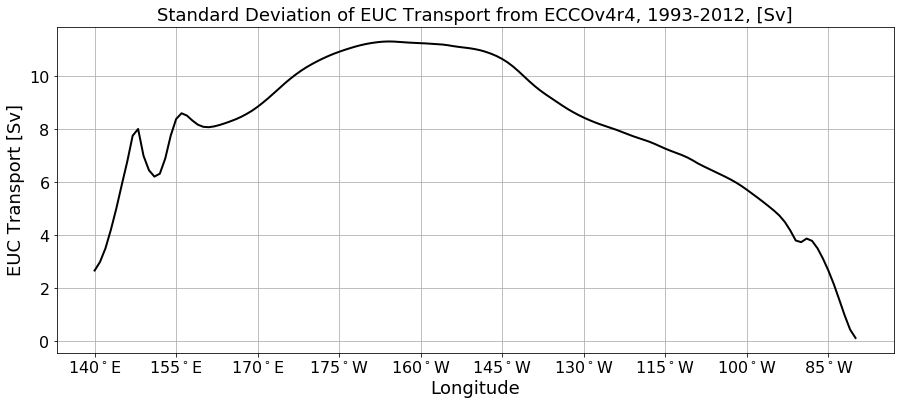

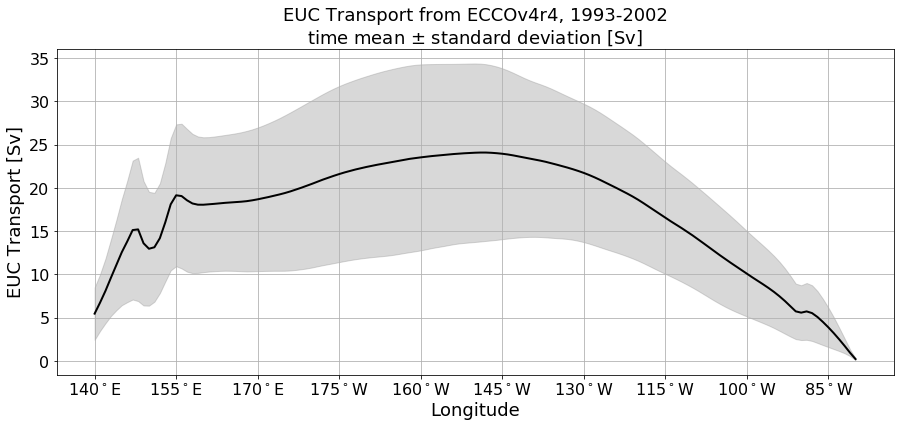

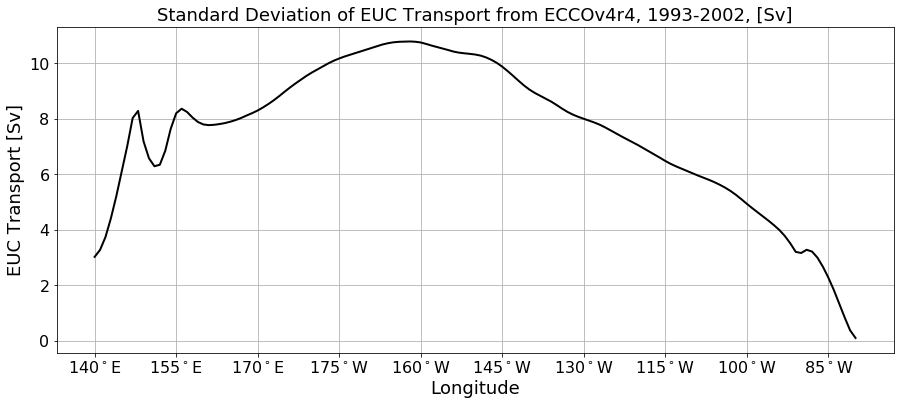

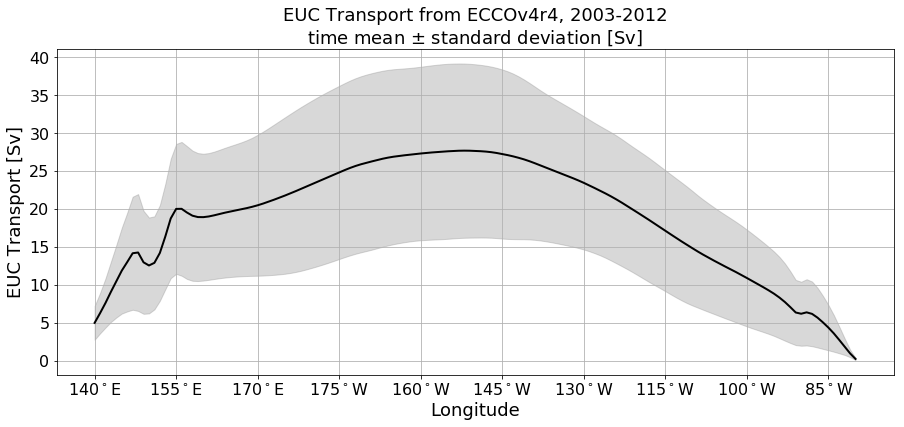

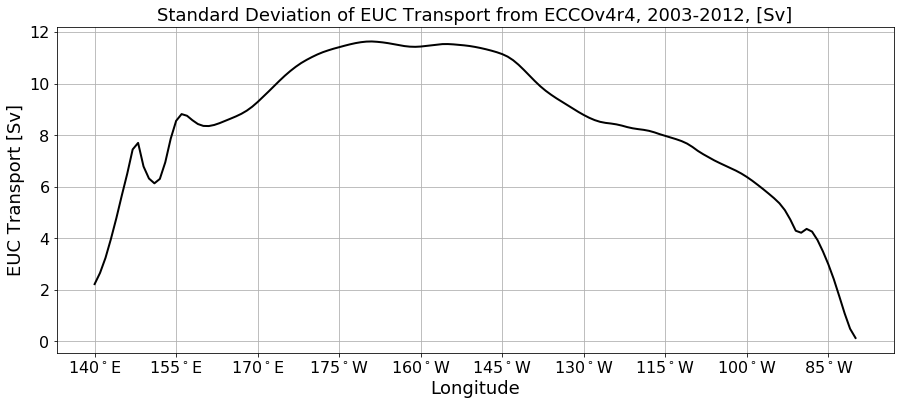

In [32]:
for (yr1,yr2) in years:
    time_slice=slice(yr1,yr2)
    euc_mean = euc['trsp'].sel(time=time_slice).mean(dim='time')
    euc_std = euc['trsp'].sel(time=time_slice).std(dim='time')

    # First plot the transport
    fig,ax = plt.subplots(1,1,figsize=(15,6))

    ax.plot(euc.lon_index,euc_mean,'k')
    ax.fill_between(euc.lon_index,euc_mean-euc_std,euc_mean+euc_std,alpha=.3,color='gray')
    plt.grid();
    dx = 15
    ax.set_xticks(euc.lon_index[slice(0,None,dx)])
    ax.set_xticklabels(euc.lon_label.values[slice(0,None,dx)]);
    ax.set_ylabel('EUC Transport [Sv]')
    ax.set_title(f'EUC Transport from ECCOv4r4, {yr1}-{yr2}\ntime mean $\pm$ standard deviation [Sv]')
    ax.set_xlabel('Longitude');
    fig.savefig(f'{figdir}/euc_eccov4r4_{yr1}_{yr2}.png',bbox_inches='tight',dpi=300)
    
    # Now plot standard deviation
    fig,ax = plt.subplots(1,1,figsize=(15,6))

    ax.plot(euc.lon_index,euc_std,'k')
    plt.grid();
    dx = 15
    ax.set_xticks(euc.lon_index[slice(0,None,dx)])
    ax.set_xticklabels(euc.lon_label.values[slice(0,None,dx)]);
    ax.set_ylabel('EUC Transport [Sv]')
    ax.set_title(f'Standard Deviation of EUC Transport from ECCOv4r4, {yr1}-{yr2}, [Sv]')
    ax.set_xlabel('Longitude');
    fig.savefig(f'{figdir}/euc_std_eccov4r4_{yr1}_{yr2}.png',bbox_inches='tight',dpi=300)

In [77]:
def euc_mean_and_std_plot(year_list):
    # First plot the transport
    fig,axs = plt.subplots(2,1,figsize=(15,15))
    
    leg_tup = ()
    for (yr1,yr2) in year_list:
        time_slice=slice(yr1,yr2)
        euc_mean = euc['trsp'].sel(time=time_slice).mean(dim='time')
        euc_std = euc['trsp'].sel(time=time_slice).std(dim='time')

        # Plot mean +/- standard deviation
        axs[0].plot(euc.lon_index,euc_mean)
        axs[0].fill_between(euc.lon_index,euc_mean-euc_std,euc_mean+euc_std,alpha=.3)
        
        # Plot standard deviation
        axs[1].plot(euc.lon_index,euc_std)
        
        # prep legend
        leg_tup += (f'Time Period: {yr1}-{yr2}',)
    
    axs[0].set_title('EUC Transport from ECCOv4r4 [Sv]')
    axs[0].legend(leg_tup,title='Time Mean $\pm$ Standard Deviation [Sv]',title_fontsize=16)
    
    axs[1].legend(leg_tup,title='Standard Deviation [Sv]',title_fontsize=16)
        
    # Nice x-axis and legend
    dx = 15
    for ax in axs:
        ax.set_xlabel('Longitude');
        ax.set_ylabel('EUC Transport [Sv]');
        ax.set_xticks(euc.lon_index[slice(0,None,dx)])
        ax.set_xticklabels(euc.lon_label.values[slice(0,None,dx)]);
        ax.grid();
        ax.set_xticks(euc.lon_index[slice(0,None,dx)]);
        ax.set_xticklabels(euc.lon_label.values[slice(0,None,dx)]);
    return fig

In [78]:
def euc_mean_diff_and_std_plot(year_list):
    # First plot the transport
    fig,axs = plt.subplots(3,1,figsize=(15,20))
    
    leg_tup = ()
    
    if len(year_list)!=2:
        raise TypeError('Incorrect length of year_list')
        
    euc_mean_diff = euc['trsp'].sel(time=slice(year_list[1][0],year_list[1][1])).mean(dim='time') -\
                    euc['trsp'].sel(time=slice(year_list[0][0],year_list[0][1])).mean(dim='time')
    euc_std_diff = euc['trsp'].sel(time=slice(year_list[1][0],year_list[1][1])).std(dim='time') -\
                   euc['trsp'].sel(time=slice(year_list[0][0],year_list[0][1])).std(dim='time')
    
    for (yr1,yr2) in year_list:
        time_slice=slice(yr1,yr2)
        euc_mean = euc['trsp'].sel(time=time_slice).mean(dim='time')
        euc_std = euc['trsp'].sel(time=time_slice).std(dim='time')

        # Plot mean +/- standard deviation
        axs[0].plot(euc.lon_index,euc_mean)
        axs[0].fill_between(euc.lon_index,euc_mean-euc_std,euc_mean+euc_std,alpha=.3)
        
        # Plot standard deviation
        axs[1].plot(euc.lon_index,euc_std)
        
        # prep legend
        leg_tup += (f'Time Period: {yr1}-{yr2}',)
    
    # Plot difference in time mean
    axs[2].plot(euc.lon_index,euc_mean_diff,'k')
    axs[2].plot(euc.lon_index,euc_std_diff,'k--')
    
    axs[0].legend(leg_tup,title='Time Mean $\pm$ Standard Deviation [Sv]',title_fontsize=16)
    axs[0].set_title('EUC Transport from ECCOv4r4 [Sv]')
    
    axs[1].legend(leg_tup,title='Standard Deviation [Sv]',title_fontsize=16)
        
    l=axs[2].legend(('Time Mean','Standard Deviation',),title='Time Mean EUC Trend\nDifference (2003-2012)-(1993-2002)',title_fontsize=16)
    plt.setp(l.get_title(), multialignment='center')
        
    # Nice x-axis and legend
    dx = 15
    for ax in axs:
        ax.set_xlabel('Longitude');
        ax.set_ylabel('EUC Transport [Sv]')
        ax.set_xticks(euc.lon_index[slice(0,None,dx)])
        ax.set_xticklabels(euc.lon_label.values[slice(0,None,dx)]);
        ax.grid();
        ax.set_xticks(euc.lon_index[slice(0,None,dx)]);
        ax.set_xticklabels(euc.lon_label.values[slice(0,None,dx)]);
    return fig

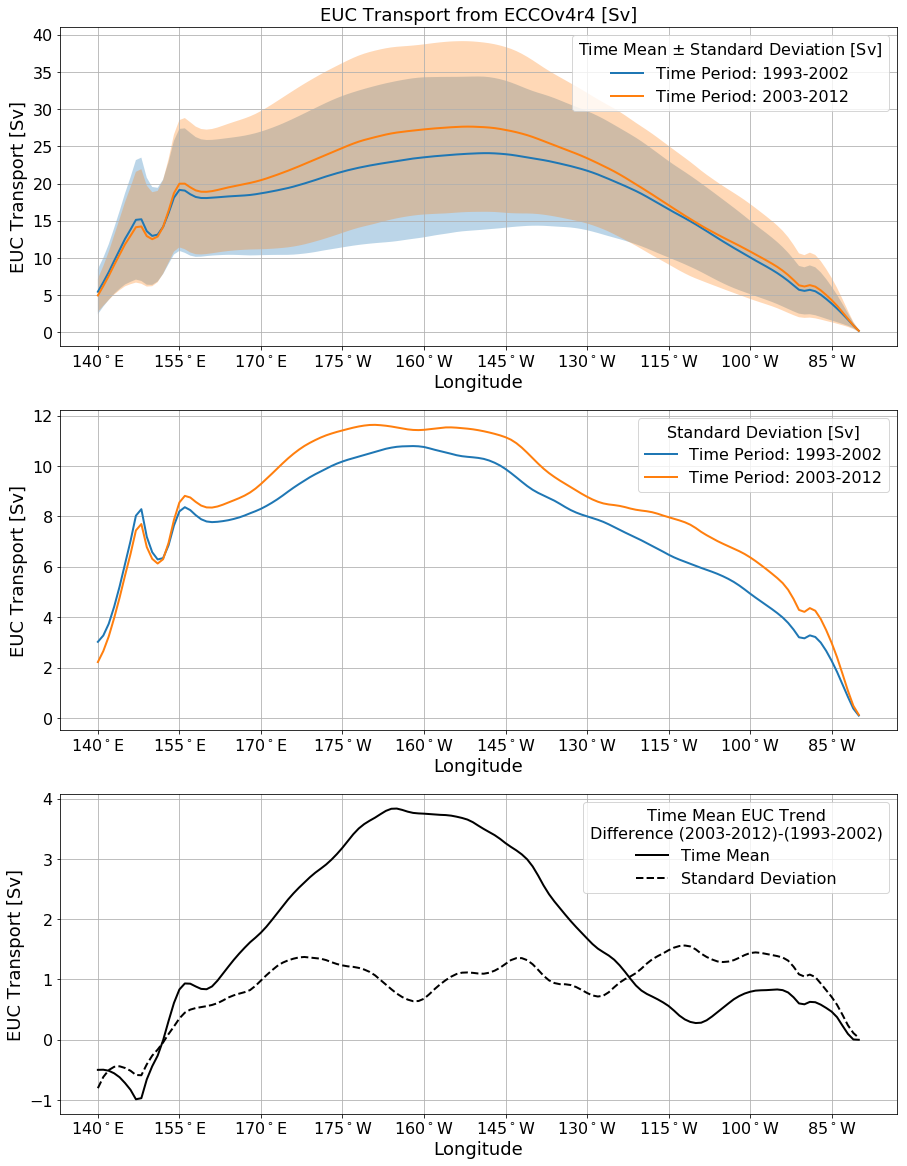

In [81]:
#fig = euc_mean_and_std_plot([('1993','2002'),('2003','2012')])
#fig.savefig(f'{figdir}/euc_eccov4r4_compare_decades.png',bbox_inches='tight',dpi=300)
fig = euc_mean_diff_and_std_plot([('1993','2002'),('2003','2012')])
fig.savefig(f'{figdir}/euc_eccov4r4_compare_decades.png',bbox_inches='tight',dpi=300)

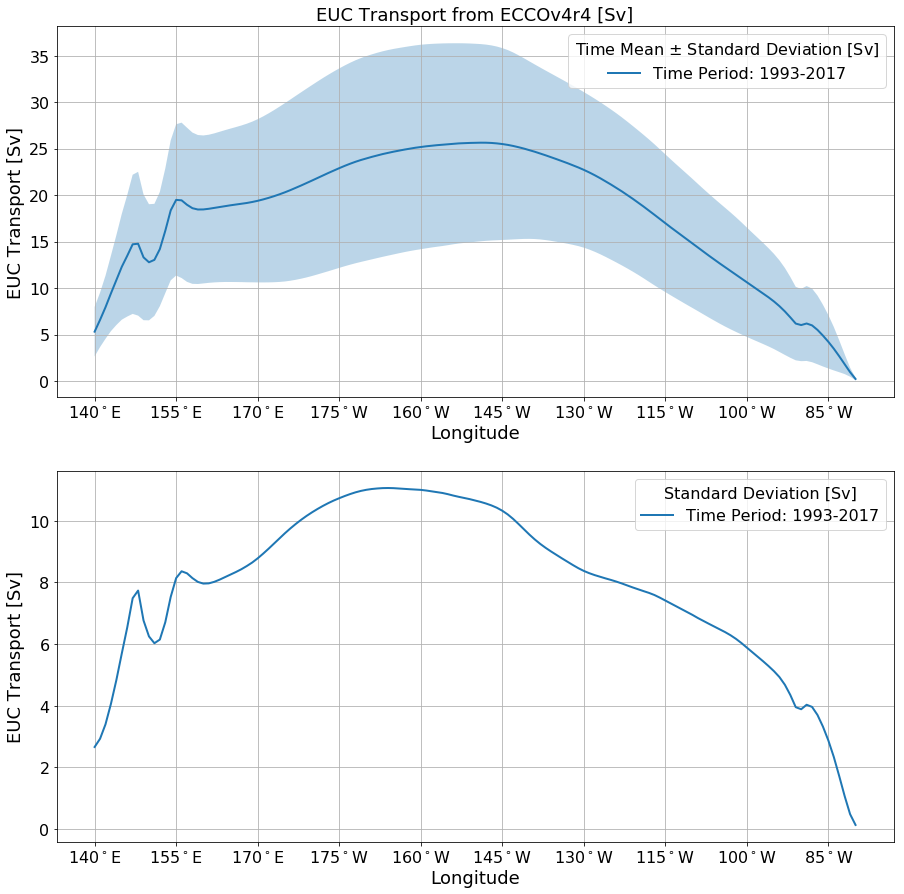

In [82]:
fig = euc_mean_and_std_plot([('1993','2017')])
fig.savefig(f'{figdir}/euc_eccov4r4_1993_2017.png',bbox_inches='tight',dpi=300)